## AMAZON ALL BEAUTY PRODUCTS DATASET

In this project I will be focussing on testing if temporal features can be used to predict the success of beauty products avaliable on Amazon based on the product review features and review sentiment.


All the files in this project are stored in my Google Drive in a folder structure which includes :
CS6140_MidTerm
|----Data
|      |----Processed (to store processed Data sets)
|      |----Raw (to store raw data)
|----Models (Stores saved models)
|----Outputs
|     |----Results
|     |----Figures
|----Notebooks (Contains all three noteboks used for this project)

This is the first Notebook used in this assignment that exclusively focusses on Preparing the dataset for EDA and model trainnig based incorporating temporal, sentimental features in addition to existing product and review data available in the fetched Dataset.


In [ ]:
# Importing requirments
import pandas as pd
import numpy as np
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Setting up working directory in Google Drive to access files and work with

from google.colab import drive
import os

drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/CS6140_MidTerm')

print("Working Directory : ", os.getcwd())

# Setting up Directories to download and store relevant files in respectiev directories
PROJECT_DIR = Path('/content/drive/MyDrive/CS6140_MidTerm')
RAW_DATA_DIR = PROJECT_DIR / 'Data' / 'Raw'
PROCESSED_DATA_DIR = PROJECT_DIR / 'Data' / 'Processed'

Mounted at /content/drive
Working Directory :  /content/drive/MyDrive/CS6140_MidTerm


what was the dataset selected for this project ? what does it include?

Dataset: McAuley Lab Amazon Reviews 2023

Why: contains timestamped review interactions + review text enabling early-life temporal + sentiment signals

Scope: All_Beauty to stay compute-friendly and because beauty is sentiment-heavy and review-driven

Further details about this dataset are available at : https://amazon-reviews-2023.github.io/#load-user-reviews





In [ ]:

## ---------------------------------------------------------
##      Step 1 : Loading Review and Meta Data Reviews
## ---------------------------------------------------------

def load_category_dataset(category):
    """
    Load reviews and metadata for a given category
    """
    review_path = PROCESSED_DATA_DIR / f"{category}_reviews.csv"
    meta_path = PROCESSED_DATA_DIR / f"{category}_meta.csv"

    reviews_df = pd.read_csv(review_path)
    meta_df = pd.read_csv(meta_path)


    # Printing Memory Related details for understanding the size of the dataset
    print()
    print(f"Review Dataset Shape : {reviews_df.shape[0]} rows X {reviews_df.shape[1]} columns")

    # Setting deep to True to find the actual space utilized by strings in the dataset
    print(f"Memory Usage - Reviews Dataset : {reviews_df.memory_usage(deep=True).sum()/1e6 : .2f} MB")
    print(f"Meta Dataset Shape : {meta_df.shape[0]} rows X {meta_df.shape[1]} columns")
    print(f"Memory Usage - Reviews Meta Dataset : {meta_df.memory_usage(deep=True).sum()/1e6 : .2f} MB")

    return reviews_df, meta_df





In [ ]:
# Loading review and meta data from csv files saved earlier

reviews_df, meta_df = load_category_dataset('All_Beauty')

# Lets understand the individual datasets
# Focussing on review dataset


reviews_df.head()


Review Dataset Shape : 701528 rows X 10 columns
Memory Usage - Reviews Dataset :  459.86 MB
Meta Dataset Shape : 112590 rows X 14 columns
Memory Usage - Reviews Meta Dataset :  254.63 MB


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True


In [ ]:
meta_df.head(5)

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,All Beauty,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Howard Products,[],{'Package Dimensions': '7.1 x 5.5 x 3 inches; ...,B01CUPMQZE,NaN
1,All Beauty,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Yes To,[],"{'Item Form': 'Powder', 'Skin Type': 'Acne Pro...",B076WQZGPM,NaN
2,All Beauty,Eye Patch Black Adult with Tie Band (6 Per Pack),4.4,26,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Levine Health Products,[],{'Manufacturer': 'Levine Health Products'},B000B658RI,NaN
3,All Beauty,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",3.1,102,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Cherioll,[],"{'Brand': 'Cherioll', 'Item Form': 'Powder', '...",B088FKY3VD,NaN
4,All Beauty,Precision Plunger Bars for Cartridge Grips – 9...,4.3,7,"['Material: 304 Stainless Steel; Brass tip', '...",['The Precision Plunger Bars are designed to w...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Precision,[],{'UPC': '644287689178'},B07NGFDN6G,NaN


In [ ]:
meta_df.shape

(112590, 14)

In [ ]:
print(f"Number of unique parent products(meta): {meta_df['parent_asin'].nunique()}")
print(f"Number of unique parent products(rev) : {reviews_df['parent_asin'].nunique()}")
print(f"Number of unique products in data(rev): {reviews_df['asin'].nunique()}")


Number of unique parent products(meta): 112590
Number of unique parent products(rev) : 112565
Number of unique products in data(rev): 115709


In [ ]:
# Identifying the 25 products without review meta data
missing_meta_products = set(reviews_df['parent_asin'].unique()) - set(meta_df['parent_asin'].unique())
print(f"Number of products without meta data: {len(missing_meta_products)}")

missing_product_reviews = set(meta_df['parent_asin'].unique()) - set(reviews_df['parent_asin'].unique())
print(f"Number of products without reviews: {len(missing_product_reviews)}")

# All products in the review dataset have meta data available, the meta data has details about 25 products which wont be used in this analysis

Number of products without meta data: 0
Number of products without reviews: 25


In [ ]:
# Filtering meta data to match the products that are reviewed

reviewed_meta_df = meta_df[meta_df['parent_asin'].isin(reviews_df['parent_asin'].unique())]

print("Shape of filtered meta data = ", reviewed_meta_df.shape)


Shape of filtered meta data =  (112565, 14)


In [ ]:
# Identifying the segments in the products sold in beauty category
reviewed_meta_df['main_category'].value_counts()

,count
main_category,
All Beauty,112110
Premium Beauty,455


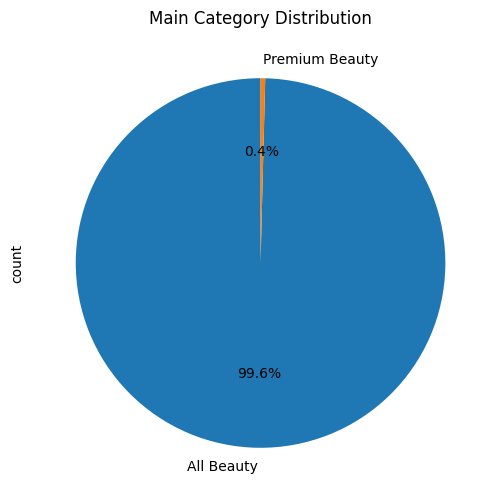

In [ ]:
# Premium Beauty Segment is minor in comparison to most products that are sold in this dataset

plt.figure(figsize=(10, 6))
reviewed_meta_df['main_category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Main Category Distribution')
plt.show()



In [ ]:
(reviews_df['parent_asin'] == "B01CUPMQZE").sum()

np.int64(5)

In [ ]:
count = int((reviews_df.groupby("parent_asin")['asin'].nunique() > 1).sum())

In [ ]:
print(f"Number of products with multiple variants : {count}")
print(f"Number of products w/o multiple variants  : {reviews_df['parent_asin'].nunique() - count}")
print(f"Percent of products with mutiple variants : {count / reviews_df['parent_asin'].nunique() * 100 :.2f}%")

Number of products with multiple variants : 995
Number of products w/o multiple variants  : 111570
Percent of products with mutiple variants : 0.88%


Metadata rating_number reflects Amazon aggregate ratings and does not always match the count of review events in the review dump; therefore all time-window features and labels will be computed strictly from review interactions to ensure consistency and avoid leakage.


From the datset, Parent_asin will be used as a product key.
asin will be used as variant only for later diagnostics. Most of the products do not have multiple variants.

In [ ]:
# Analysing the User Reviews Data with Parent Asin as primary identifier

print("Columns in Review Dataset : ", reviews_df.columns)

Columns in Review Dataset :  Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')


In [ ]:
# identifying null values in reviews_df
reviews_df.isnull().sum()

,0
rating,0
title,160
text,212
images,0
asin,0
parent_asin,0
user_id,0
timestamp,0
helpful_vote,0
verified_purchase,0


In [ ]:
# Since this analysis focusses more on user review sentiments and rating velocity , images will be dropped.

proper_reviews_df = reviews_df.drop(columns=['images'])

In [ ]:
# Reviewing for any ratings that are not between 1 - 5
print(proper_reviews_df['rating'].unique())

print("The data type for ratings in the dataset : ", proper_reviews_df['rating'].dtype)

[5. 4. 1. 3. 2.]
The data type for ratings in the dataset :  float64


In [ ]:
# Analysing title in reviews
# Title already has 160 null values
# Count the number of rows with null title

null_title_reviews = proper_reviews_df['title'].isna().sum()
one_star_title = (proper_reviews_df['title'].str.lower() == 'one star').sum()
two_star_title = (proper_reviews_df['title'].str.lower() == 'two star').sum()
three_star_title = (proper_reviews_df['title'].str.lower() == 'three star').sum()
four_star_title = (proper_reviews_df['title'].str.lower() == 'four star').sum()
five_star_title = (proper_reviews_df['title'].str.lower() == 'five star').sum()


print(f"The number of reviews without title                                      : {null_title_reviews} reviews")
print(f"The number of reviews with title 'One Star'                              : {one_star_title} reviews")
print(f"The number of reviews that have different rating with 'One Star' title   : {len(proper_reviews_df[(proper_reviews_df['title'].str.lower() == 'one star') & (proper_reviews_df['rating'] != 1)])} reviews" )
print(f"The number of reviews with title 'Two Star'                              : {two_star_title} reviews")
print(f"The number of reviews that have different rating with 'Two Star' title   : {len(proper_reviews_df[(proper_reviews_df['title'].str.lower() == 'two star') & (proper_reviews_df['rating'] != 2)])} reviews" )
print(f"The number of reviews with title 'Three Star'                            : {three_star_title} reviews")
print(f"The number of reviews that have different rating with 'Three Star' title : {len(proper_reviews_df[(proper_reviews_df['title'].str.lower() == 'three star') & (proper_reviews_df['rating'] != 3)])} reviews" )
print(f"The number of reviews with title 'Four Star'                             : {four_star_title} reviews")
print(f"The number of reviews that have different rating with 'Four Star' title  : {len(proper_reviews_df[(proper_reviews_df['title'].str.lower() == 'four star') & (proper_reviews_df['rating'] != 4)])} reviews" )
print(f"The number of reviews with title 'Five Star'                             : {five_star_title} reviews")
print(f"The number of reviews that have different rating with 'Five Star' title  : {len(proper_reviews_df[(proper_reviews_df['title'].str.lower() == 'five star') & (proper_reviews_df['rating'] != 5)])} reviews" )




The number of reviews without title                                      : 160 reviews
The number of reviews with title 'One Star'                              : 7629 reviews
The number of reviews that have different rating with 'One Star' title   : 33 reviews
The number of reviews with title 'Two Star'                              : 0 reviews
The number of reviews that have different rating with 'Two Star' title   : 0 reviews
The number of reviews with title 'Three Star'                            : 1 reviews
The number of reviews that have different rating with 'Three Star' title : 0 reviews
The number of reviews with title 'Four Star'                             : 2 reviews
The number of reviews that have different rating with 'Four Star' title  : 0 reviews
The number of reviews with title 'Five Star'                             : 17 reviews
The number of reviews that have different rating with 'Five Star' title  : 1 reviews


In [ ]:
# There are a meaningful number of one star appearance in the title that is expected from user reviews where dissapointed users voice their opinion in reviews in addition to ratings One Star.
# now that has been established the goal is to determine if "oen star" is a reliable indicator of ratings

#& (proper_reviews_df['rating'] != 1)

In [ ]:
# Reviews with Strict title "One Star"
pattern = r"^\W*\bone[\s-]*star\b\W*$"
len(proper_reviews_df[(proper_reviews_df['title'].fillna("").str.contains(pattern, case=False, regex=True))])

7631

In [ ]:
proper_reviews_df[(proper_reviews_df['title'].fillna("").str.contains(pattern, case=False, regex=True))]['title'].unique()


array(['One Star', 'one star', 'One star', 'ONE STAR', 'One star.',
       'One Star 🌟'], dtype=object)

In [ ]:
proper_reviews_df['title'].str.lower() == 'one star'

,title
0,False
1,False
2,False
3,False
4,False
...,...
701523,False
701524,False
701525,False
701526,False


In [ ]:
proper_reviews_df[(proper_reviews_df['title'].fillna("").str.contains(pattern, case=False, regex=True)) & (proper_reviews_df['rating'] != 1)].head()

,rating,title,text,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
22494,5.0,One Star,Great items,B00XQDVKZC,B00XQDVKZC,AHSPLBDFAEFO5PXLAVHVO3O44NSA,1465933793000,0,False
36193,2.0,One Star,This is literally a skirt not a belt very bulk...,B00TT5IW8Y,B00TT5IW8Y,AHG3LF2GH625C5HAVBE4AXOZ5REQ,1436997534000,3,True
37412,2.0,One Star,Returned Cheap product.,B00DIAYF8W,B00DIAYF8W,AHNRMS5TSLCGQWKIITDUUMWI3FKA,1430859433000,0,True
87814,5.0,One Star,4 pieces of the palette were completely broken,B01BZBE2VU,B01BZBE2VU,AGOR5RWGOD5GRMDPRNO4DFXACZ5Q,1483246484000,0,True
88849,2.0,One Star,Absolutely no benefit. Doesn't absorb into the...,B06X1FD3GP,B06X1FD3GP,AFOHMZUN2NTZZJIICAAONWDTVO6Q,1518159139543,0,False


In [ ]:
proper_reviews_df[(proper_reviews_df['title'].fillna("").str.contains(pattern, case=False, regex=True)) & (proper_reviews_df['rating'] != 1)]['title'].unique()

array(['One Star', 'one star'], dtype=object)

In [ ]:
# Reviews with title containing "One Star"
pattern = r"\bone[\s-]*star\b"
len(proper_reviews_df[(proper_reviews_df['title'].fillna("").str.contains(pattern, case=False, regex=True)) & (proper_reviews_df['rating'] != 1)])

50

In [ ]:
proper_reviews_df[(proper_reviews_df['title'].fillna("").str.contains(pattern, case=False, regex=True))]['rating'].value_counts()

,count
rating,
1.0,7654
5.0,21
4.0,11
2.0,10
3.0,8


In [ ]:
pd.set_option("display.max_colwidth", None)   # Printing the entire text column to understand the review
proper_reviews_df.loc[(proper_reviews_df['title'].fillna("").str.contains(pattern, case=False, regex=True)) & (proper_reviews_df['rating'] != 1), ('rating', 'title', 'text')].head(15)

,rating,title,text
238,4.0,Beautiful compact mirror w/high-gloss shine; saying is one star less than special,"This is a beautiful compact mirror with regular and close-up mirrors on the inside. Both mirrors are small but functional. It is fashioned like a pocket watch. The clasp is solid and the finish is high-gloss like the interior mirror itself.<br /><br />The saying (see below) on the outside is nice but the last two words of ""I WIN!"" may be taken wrong; it depends on the girlfriend. <br /><br />TO MY<br /><br />Girlfriend<br /><br />NEVER FORGET THAT<br /><br />I love you<br /><br />THE MOST,<br />I WIN!<br /><br />In summary, this is a lovely gift in a nice gift box. The current price of $22.99 is competitive. I would have given this 5 stars if it were not for the last two words."
22494,5.0,One Star,Great items
30124,5.0,One Star changed to 5!,Missing several tubes...<br />I gave 5 stars now that cs sent a new pack!
36193,2.0,One Star,This is literally a skirt not a belt very bulky extre large indeed. i gave it away
37412,2.0,One Star,Returned Cheap product.
60068,4.0,These are super adorable. I docked one star because they tend ...,"These are super adorable. I docked one star because they tend to slip off of my daughter's head, but that may just be because she's so small. But the matching set is super cute and they held up through a few vacations!"
87814,5.0,One Star,4 pieces of the palette were completely broken
88849,2.0,One Star,Absolutely no benefit. Doesn't absorb into the beard.
98737,4.0,Thankful to find this great product. One star off for price point,"It works great! Great ingredient list. Just the kind of product I had hoped to find. A little goes a long way. However, this is a very small container (picture a 'picnic size' salt shaker). Price is too high."
113183,3.0,One Star,Didn’t hold hair as expected. But was able to return.


In [ ]:
# Title inconsistencies with rating are rare and typically reflect natural phrasing (e.g., ‘one star off’). rating will be treated as authoritative and use title only as
#additional text context for sentiment, not as a proxy for rating


'''The “prove it like an analyst” step (1 quick experiment)

Do a small A/B check later:

Model/features using sentiment from text only

vs sentiment from title + text
Compare PR-AUC or Precision@K. If improvement is tiny, you can still choose simplicity and explain why. If it improves, you keep it and you have evidence.

Bottom line: Don’t drop title on principle. In retail review modeling, the headline is usually a helpful signal, and your mismatch rate is far too small to justify removing it.
'''

'The “prove it like an analyst” step (1 quick experiment)\n\nDo a small A/B check later:\n\nModel/features using sentiment from text only\n\nvs sentiment from title + text\nCompare PR-AUC or Precision@K. If improvement is tiny, you can still choose simplicity and explain why. If it improves, you keep it and you have evidence.\n\nBottom line: Don’t drop title on principle. In retail review modeling, the headline is usually a helpful signal, and your mismatch rate is far too small to justify removing it.\n'

In [ ]:
# Understanding the diversity in users
reviews_df['user_id'].nunique()

631986

In [ ]:
reviews_df['user_id'].value_counts().head(25)

,count
user_id,
AG73BVBKUOH22USSFJA5ZWL7AKXA,165
AEZP6Z2C5AVQDZAJECQYZWQRNG3Q,146
AEMP3A7IKW37CMWFXNKXWW6HGJHA_1,115
AHDVSLWHSORYGG3S5QZMVDFNOXUQ,108
AGZUJTI7A3JFKB4FP5JOH6NVAJIQ_1,87
AFDYIK3FNPY2JFBQYUWC6GSBMIRQ_2,83
AFXF3EGQTQDXMRLDWFU7UBFQZB7Q,81
AEJU3Z6HDAERETMYI2CXBQVPPDFA,79
AHY2TURQPNIDXZGH2CMQLZ343YMQ,69


In [ ]:
# Build a bucketed bar chart with number of user reviews
user_counts = proper_reviews_df["user_id"].value_counts()

# 2) bucket users
bins = [0, 1, 2, 5, 10, 20, 50, 100, float("inf")]
labels = ["1", "2", "3–5", "6–10", "11–20", "21–50", "51–100", "101+"]

bucketed = pd.cut(user_counts, bins=bins, labels=labels, right=True, include_lowest=True)
bucket_counts = bucketed.value_counts().reindex(labels)

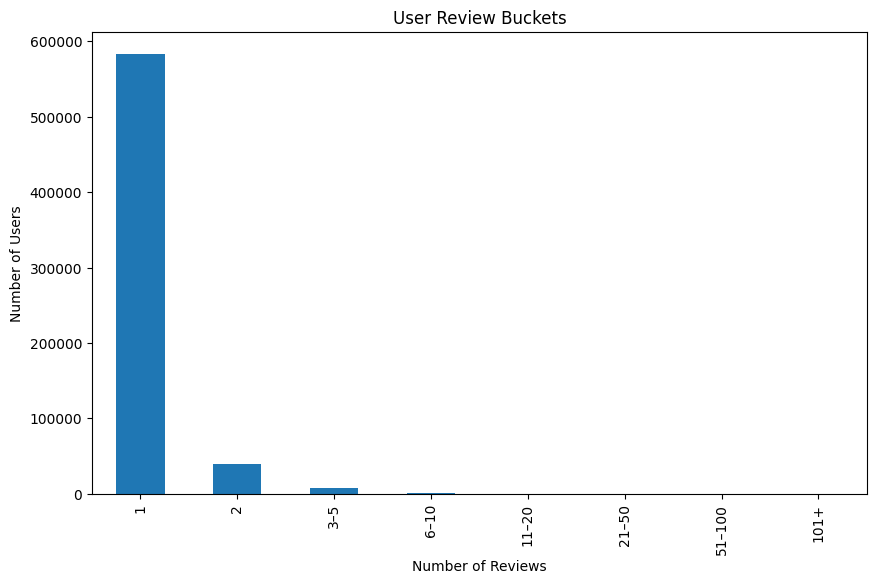

In [ ]:
bucket_counts.plot(kind="bar", figsize=(10, 6))
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Users")
plt.title("User Review Buckets")
plt.show()

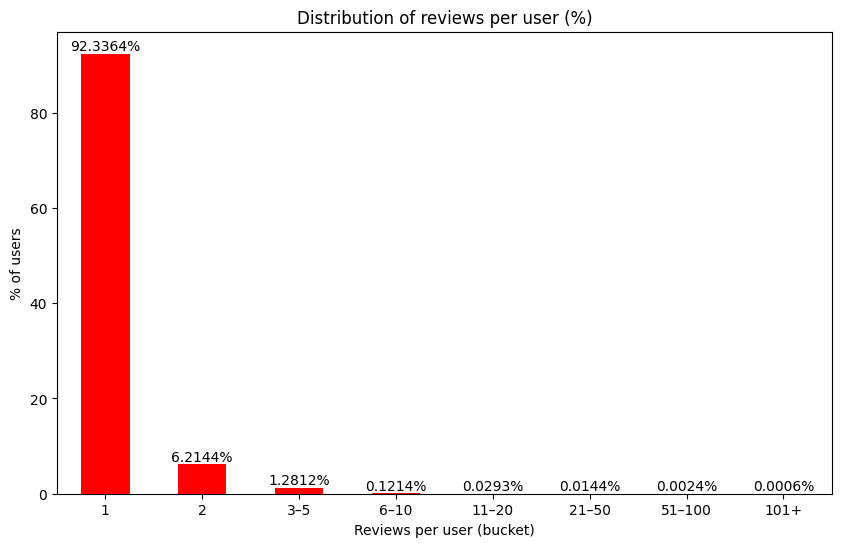

In [ ]:
bucket_sum = bucket_counts.sum()
bucket_pct = (bucket_counts/bucket_sum) * 100
bucket_pct.plot(kind="bar", color = "red", figsize=(10, 6))
# Add percentage on bars
for i, v in enumerate(bucket_pct):
    plt.text(i, v, f"{v:.4f}%", ha='center', va='bottom')
plt.xlabel("Reviews per user (bucket)")
plt.ylabel("% of users")
plt.title("Distribution of reviews per user (%)")
plt.xticks(rotation=0)
plt.show()

In [ ]:
pct_one = (user_counts == 1).mean() * 100
p95 = user_counts.quantile(0.95)
print(f"% users with exactly 1 review: {pct_one:.2f}%")
print(f"95th percentile reviews per user: {p95:.0f}")

% users with exactly 1 review: 92.34%
95th percentile reviews per user: 2


In [ ]:
user_counts

,count
user_id,
AG73BVBKUOH22USSFJA5ZWL7AKXA,165
AEZP6Z2C5AVQDZAJECQYZWQRNG3Q,146
AEMP3A7IKW37CMWFXNKXWW6HGJHA_1,115
AHDVSLWHSORYGG3S5QZMVDFNOXUQ,108
AGZUJTI7A3JFKB4FP5JOH6NVAJIQ_1,87
...,...
AEMDA2DTVVZ5AIQFPOSJAMZDJXVQ,1
AEBK65FTLDPCS6FKISQDPHY7GWZQ,1
AE53PWCXH4YIMN3N3NVM2DNW4Z4A,1


In [ ]:
sample_user = reviews_df[reviews_df['user_id'] == "AG73BVBKUOH22USSFJA5ZWL7AKXA"]
print(f"The 5th percentile of all reviews posted by the most review generated user : {sample_user['rating'].quantile(0.05)}")
print(f"The 25th percentile of all reviews posted by the most review generated user : {sample_user['rating'].quantile(0.25)}")
print(f"The 50th percentile of all reviews posted by the most review generated user : {sample_user['rating'].quantile(0.50)}")
print(f"The 75th percentile of all reviews posted by the most review generated user : {sample_user['rating'].quantile(0.75)}")
print(f"The 85th percentile of all reviews posted by the most review generated user : {sample_user['rating'].quantile(0.85)}")
print(f"The 95th percentile of all reviews posted by the most review generated user : {sample_user['rating'].quantile(0.95)}")
print(f"The 99th percentile of all reviews posted by the most review generated user : {sample_user['rating'].quantile(0.99)}")

The 5th percentile of all reviews posted by the most review generated user : 4.0
The 25th percentile of all reviews posted by the most review generated user : 4.0
The 50th percentile of all reviews posted by the most review generated user : 5.0
The 75th percentile of all reviews posted by the most review generated user : 5.0
The 85th percentile of all reviews posted by the most review generated user : 5.0
The 95th percentile of all reviews posted by the most review generated user : 5.0
The 99th percentile of all reviews posted by the most review generated user : 5.0


In [ ]:
# Now that user rated most of the products higher, verifying if users reviewed different peoducts or if there are multiple ratings for same product
print(f"The number of different products reviewed by this customer : {sample_user['asin'].nunique()} reviews")
print(f"The number of different reviews posted for group of products : {sample_user['parent_asin'].nunique()} reviews")

# Verified with asin to identify distinct products and not the family/ parent they belong to.
# The user has reviewed just 2 products that belonged to same parent id


The number of different products reviewed by this customer : 165 reviews
The number of different reviews posted for group of products : 164 reviews


In [ ]:
# Reviewer activity is highly long-tailed: 92.7% of users leave only one review, the 95th percentile is 2 reviews/user, and only 4 users have >100 reviews (max 165).
# This aligns with expected retail behavior where most customers review infrequently.
# As a result, user_id is used for EDA-only (to validate concentration/spam risk) and exclude it from modeling to keep the focus on product-level signals rather than user-specific behavior.
# Even the most active reviewer contributes a negligible fraction of total reviews and their ratings skew positive, reinforcing the decision to exclude user_id from modeling and focus on product-level aggregates

In [ ]:
# Analyzing helpful votes
print("Helpful Votes Statistics : ")
print(f"Data Type : {reviews_df['helpful_vote'].dtype}")
print(f"Unique Values : {reviews_df['helpful_vote'].unique()}")
print(f"Max Value :  {reviews_df['helpful_vote'].max()}")
print(f"Min Value :  {reviews_df['helpful_vote'].min()}")

Helpful Votes Statistics : 
Data Type : int64
Unique Values : [  0   1   2 430   4   3   8   5  13   6  16   9   7  49  11  15  58  24
  20  34  10  21  50  19  52  23  14  38  18  40  36  31  30  22  37  43
  29  51 120  47  32  12  33  17  92  42  41  63  27  28  25 133  57  26
  64  71  35 114  89  53 101  60  72  45  46 419  59 117  44  65  39  74
  99  56  54  48  69  75 178  55  67 111 150 143  73  79 148 177  80 266
 154  86  66  95  81 165 140 171  76  85  62 113  61 404 166 124 118  90
 607 315  70  88 112 426 102 158 145 129  98 107 109  78 185 314 187 123
 155 142 126 218 127 104 172 147 331 106  68 141 159 175 173 241 135 646
 119 151 149  83  82 136 134 132  93 121 594 399 389 473 351 467 435 354
 234 519  94 131 181 103 105 431 100 190  77 138 367 197 125 152 244 409
 249  91  87 373 144 233 179  84 116 200 203 279 193  96 161 466 122 130
 552 184 108 110 163 434 365 160 139 183 411 176 267 170 156 208 128 168
 188 323 137  97 186 350 230 381 283 201 167 424 169 334 164 4

In [ ]:
# Checking for count of different values in helpful votes category
print(reviews_df['helpful_vote'].value_counts())

helpful_vote
0      514089
1       98801
2       34266
3       16520
4        9514
        ...  
360         1
439         1
325         1
199         1
382         1
Name: count, Length: 240, dtype: int64


In [ ]:
helpful_vote_counts = reviews_df['helpful_vote'].value_counts().sort_index()
helpful_vote_pct = reviews_df['helpful_vote'].value_counts(normalize=True).sort_index()
print(pd.concat([helpful_vote_counts, helpful_vote_pct.round(4)], axis=1))

               count  proportion
helpful_vote                    
0             514089      0.7328
1              98801      0.1408
2              34266      0.0488
3              16520      0.0235
4               9514      0.0136
...              ...         ...
519                1      0.0000
552                1      0.0000
594                1      0.0000
607                1      0.0000
646                1      0.0000

[240 rows x 2 columns]


In [ ]:
print(f"Mean : {reviews_df['helpful_vote'].mean():.2f}")
print(f"Median : {reviews_df['helpful_vote'].median():.2f}")
print(f"25th Percentile : {reviews_df['helpful_vote'].quantile(0.25):.2f}")
print(f"75th Percentile : {reviews_df['helpful_vote'].quantile(0.75):.2f}")
print(f"95th Percentile : {reviews_df['helpful_vote'].quantile(0.95):.2f}")
print(f"99th Percentile : {reviews_df['helpful_vote'].quantile(0.99):.2f}")

Mean : 0.92
Median : 0.00
25th Percentile : 0.00
75th Percentile : 1.00
95th Percentile : 4.00
99th Percentile : 13.00


In [ ]:
# helpful_vote is sparse and heavy-tailed; therefore it can be aggregated at product level rather than using raw values.
# helpful_votes can also include some futire information ; they accumulate after a review is posted.

In [ ]:
reviews_df[reviews_df['helpful_vote'] > 1]['helpful_vote'].unique()

array([  2, 430,   4,   3,   8,   5,  13,   6,  16,   9,   7,  49,  11,
        15,  58,  24,  20,  34,  10,  21,  50,  19,  52,  23,  14,  38,
        18,  40,  36,  31,  30,  22,  37,  43,  29,  51, 120,  47,  32,
        12,  33,  17,  92,  42,  41,  63,  27,  28,  25, 133,  57,  26,
        64,  71,  35, 114,  89,  53, 101,  60,  72,  45,  46, 419,  59,
       117,  44,  65,  39,  74,  99,  56,  54,  48,  69,  75, 178,  55,
        67, 111, 150, 143,  73,  79, 148, 177,  80, 266, 154,  86,  66,
        95,  81, 165, 140, 171,  76,  85,  62, 113,  61, 404, 166, 124,
       118,  90, 607, 315,  70,  88, 112, 426, 102, 158, 145, 129,  98,
       107, 109,  78, 185, 314, 187, 123, 155, 142, 126, 218, 127, 104,
       172, 147, 331, 106,  68, 141, 159, 175, 173, 241, 135, 646, 119,
       151, 149,  83,  82, 136, 134, 132,  93, 121, 594, 399, 389, 473,
       351, 467, 435, 354, 234, 519,  94, 131, 181, 103, 105, 431, 100,
       190,  77, 138, 367, 197, 125, 152, 244, 409, 249,  91,  8

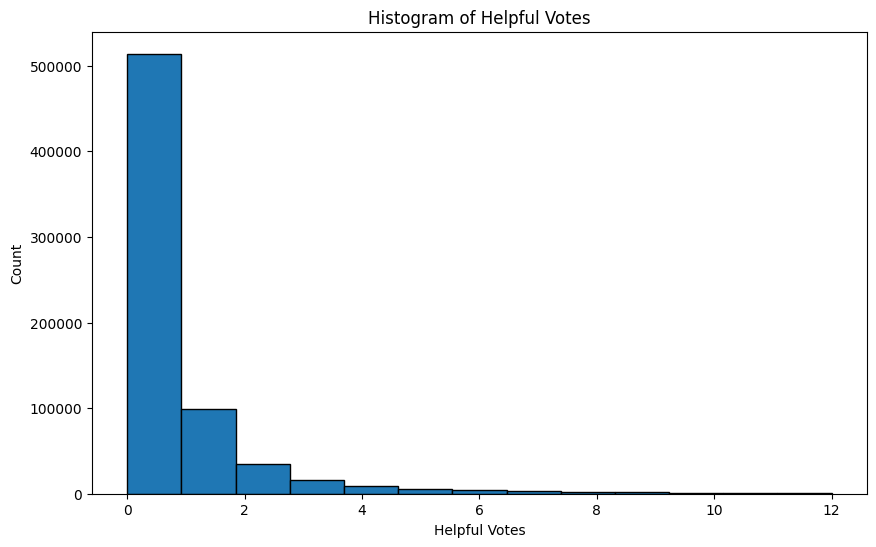

In [ ]:
# Plotting the histogram of helpful votes below 13
plt.figure(figsize=(10, 6))
plt.hist(reviews_df[reviews_df['helpful_vote'] < 13]['helpful_vote'], bins= 13, edgecolor='black')
plt.xlabel('Helpful Votes')
plt.ylabel('Count')
plt.title('Histogram of Helpful Votes')
plt.show()

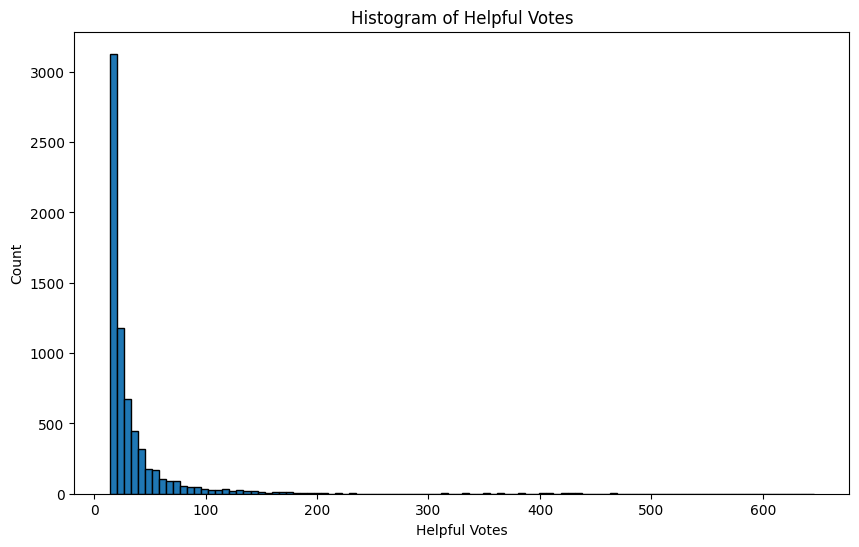

In [ ]:
# Plotting the histogram of helpful votes above 13
plt.figure(figsize=(10, 6))
plt.hist(reviews_df[reviews_df['helpful_vote'] > 13]['helpful_vote'], bins=100, edgecolor='black')
plt.xlabel('Helpful Votes')
plt.ylabel('Count')
plt.title('Histogram of Helpful Votes')
plt.show()

In [ ]:
# Analyzing verified purchase
print("Verified Purchase Statistics : ")
print(f"Data Type : {reviews_df['verified_purchase'].dtype}")
print(f"Unique Values : {reviews_df['verified_purchase'].unique()}")
print(f"Value Counts :")
counts = reviews_df['verified_purchase'].value_counts()
percentages = reviews_df['verified_purchase'].value_counts(normalize=True) * 100
print(pd.concat([counts, percentages.round(2)], axis=1))

Verified Purchase Statistics : 
Data Type : bool
Unique Values : [ True False]
Value Counts :
                    count  proportion
verified_purchase                    
True               634969       90.51
False               66559        9.49


In [ ]:
# Since the verified purchases are at 90% , it can be aggregated into a shorter time window to verify it it contributes to determine success.

In [ ]:
# Analysing the timestamp for reviews

reviews_df['timestamp'].head()

,timestamp
0,1588687728923
1,1588615855070
2,1589665266052
3,1643393630220
4,1609322563534


In [ ]:
# the time stamps are in UNIX format converting to datetime format
reviews_df['review_date'] = pd.to_datetime(reviews_df['timestamp'], unit='ms')
reviews_df['review_date'] = reviews_df['review_date'].dt.normalize()

print(reviews_df['review_date'].head())

0   2020-05-05
1   2020-05-04
2   2020-05-16
3   2022-01-28
4   2020-12-30
Name: review_date, dtype: datetime64[ns]


In [ ]:
print(f"The data type of review date : {reviews_df['review_date'].dtype}")
print(f"The start date in this dataset : {reviews_df['review_date'].min()}")
print(f"Start Date Year : {reviews_df['review_date'].min().year} Month : {reviews_df['review_date'].min().month}")
print(f"The end date in this dataset : {reviews_df['review_date'].max()}")
print(f"End Date Year : {reviews_df['review_date'].max().year} Month : {reviews_df['review_date'].max().month}")

The data type of review date : datetime64[ns]
The start date in this dataset : 2000-11-01 00:00:00
Start Date Year : 2000 Month : 11
The end date in this dataset : 2023-09-09 00:00:00
End Date Year : 2023 Month : 9


In [ ]:
# A google search of important milestones in Amazon Beauty
# - 2003: Amazon expanded into Health & Personal Care.
# - 2004: Dedicated beauty line introduced on the platform.
# - 2013: Premium Beauty (formerly “Luxury Beauty”) launched for higher-end brands.
# - 2017: Beauty category “ungated” (lower barrier for sellers/brands to list).
# - 2018: Indie Beauty launched to highlight emerging/niche brands.
# - 2019: Amazon launched private-label skincare brand (e.g., Belei).

# These milestones provide a plausible backdrop for changes in product availability and review activity,
# but do not prove causality in our dataset. We treat them as interpretive context only.

In [ ]:
# The timestamps do fit in the time stamp coverage of the dataset which startes from May 1996 - Sept 2023

# Now that reviews are in a 23 years time span lets analyze the reviews by year
reviews_by_year = reviews_df['review_date'].dt.year.value_counts().reset_index()
reviews_by_year.columns = ['review_date', 'count']
print(reviews_by_year)

    review_date   count
0          2020  126753
1          2021  124897
2          2019   99120
3          2018   72707
4          2017   68035
5          2016   62747
6          2022   61581
7          2015   36239
8          2014   16279
9          2023   14405
10         2013    7948
11         2012    2803
12         2011    1877
13         2010    1586
14         2008    1269
15         2009    1207
16         2007    1162
17         2006     419
18         2005     267
19         2004     134
20         2003      56
21         2002      24
22         2001      12
23         2000       1


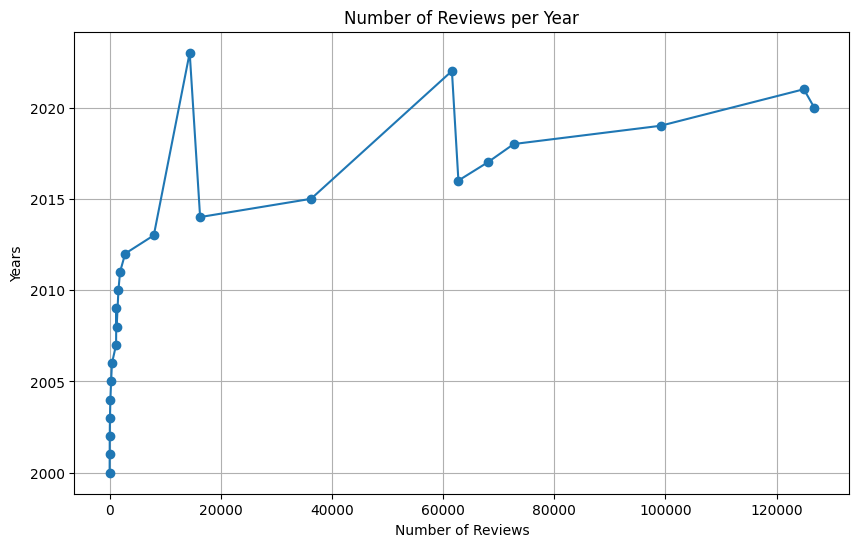

In [ ]:
# Plotting a line plot for the reviews per year
plt.figure(figsize=(10, 6))
plt.plot(reviews_by_year['count'], reviews_by_year['review_date'], marker='o')
plt.xlabel('Number of Reviews')
plt.ylabel('Years')
plt.title('Number of Reviews per Year')
plt.grid(True)
plt.show()

In [ ]:
# Observations:
# 1. Most products first appear in reviews between ~2014–2022, peaking in 2019–2021.
# 2. This increase reflects a growth in online beauty adoption and evolving Amazon storefronts (from above milestones) category expansion, and easier onboarding for brands/sellers over time.
# 3. 2023 counts are lower in comparison to other years, due to partial-year coverage (dataset ends in Sep 2023).
# 4. Early years (2000–2009) are extremely sparse and may reflect limited adoption and/or dataset coverage.

In [ ]:
# this falls in line with the popularity of online purchases picking up interest
# 2013: The company launched the dedicated Amazon Premium Beauty store to provide a more curated and high-end selection.

In [ ]:
# Count of products by first-review year

# Product’s “launch” is set as the FIRST OBSERVED review date for each parent_asin.
# This is a proxy for true market launch and is used to:
#   (1) create launch-year cohorts,
#   (2) support time-based train/test splits, and
#   (3) anchor day-from-launch windows for leakage-safe feature engineering.

product_first_review = reviews_df.groupby('parent_asin')['review_date'].min().reset_index()
product_first_review.columns = ['parent_asin', 'first_review_date']

product_launch_years = product_first_review['first_review_date'].dt.year.value_counts().reset_index()
product_launch_years.columns = ['review_year', 'count']
print(product_launch_years)

    review_year  count
0          2021  21816
1          2020  20424
2          2019  17222
3          2018  11603
4          2017   9686
5          2022   9026
6          2016   8930
7          2015   5285
8          2014   3083
9          2013   1628
10         2023   1536
11         2012    748
12         2011    477
13         2010    374
14         2009    250
15         2008    179
16         2007    158
17         2006     47
18         2005     39
19         2004     31
20         2003     14
21         2002      5
22         2001      3
23         2000      1


In [ ]:
# The distribution of first-review cohorts indicates when products first become visible in the review logs.
# Peaks in recent years typically reflect (a) increased catalog activity and (b) higher review participation.
# 2023 should be interpreted cautiously if the dataset covers only part of the year.

# Note : This proxy could lag from the actual market launch for the product, due to missing / sparse reviews in the dataset.
# Although the dataset spans ~1996–2023, the review logs should be treated as an observed sample of review events, not a complete historical set of reviews.
# It was obserevd that metadata aggregated reviews do not exactly match with the number of reviews in the reviews dataframe.

# We compute all time-windowed features and labels strictly from reviews_df (observed review events) to ensure consistency.
# Metadata will be used primarily for static enrichment (e.g., category/store/price), not for time-based outcome signals.


In [ ]:
# Analysis of Ratings Distributions

# Rating Distribution
rating_dist  = reviews_df['rating'].value_counts().sort_index()
rating_dist_pct = reviews_df['rating'].value_counts(normalize=True).sort_index() * 100
print(pd.concat([rating_dist, rating_dist_pct.round(2)], axis=1))

         count  proportion
rating                    
1.0     102080       14.55
2.0      43034        6.13
3.0      56307        8.03
4.0      79381       11.32
5.0     420726       59.97


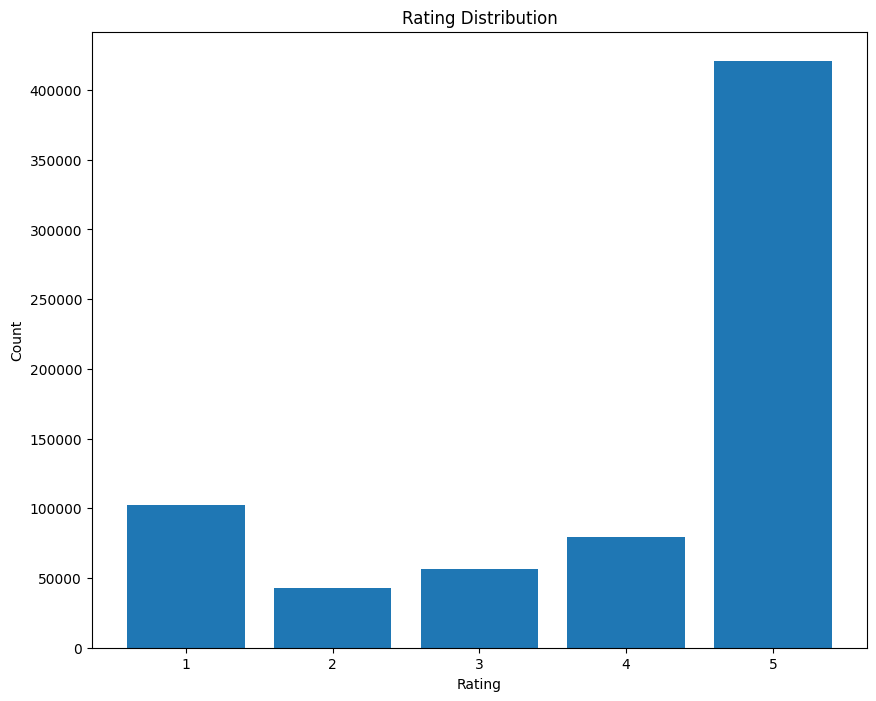

In [ ]:
# Plotting graph for ranking distribution
plt.figure(figsize = (10, 8))
plt.bar(rating_dist.index, rating_dist.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

In [ ]:
# There is a strong positive bias in the dataset ; 4 - 5 stars  ~ 71% (11.32 + 59.97)
# Negative Reviews do exist at ~ 21% (1 - 2 stars)
# The Average Reviews segment (3 stars) is small.
# As a result of higher positive rating tendencies, the median for products can be higher

# Eventhough, ratings are high, product success is determined by its traction.

# Ratings are positively skewed, consistent with known review behavior (many satisfied customers rate 5). Therefore, we avoid relying on mean rating
# alone and instead model success using both early demand signals (review velocity) and quality signals (rating stability + sentiment).

In [ ]:
# =============================================================================
# EDA SUMMARY (Key decisions before feature engineering)
# =============================================================================
# 1) Modeling grain + joins:
#    - We model at the parent_asin (product-family) level to align with metadata and simplify aggregation.
#    - Meta contains a small set of parent_asins not present in reviews; meta is subset to the review universe for clean joins.
#    - Meta aggregate counts (e.g., rating_number) do not necessarily match observed review rows, so reviews_df is treated
#      as the source-of-truth for all temporal features/labels; meta is used only for static enrichment/slicing.

# 2) Text fields:
#    - Title has negligible missingness and occasional semantic mismatch (e.g., "one star off") but is not used as a label proxy.
#    - Rating is treated as the authoritative signal; title is optional text context for sentiment (A/B later: text-only vs title+text).

# 3) User behavior + fairness:
#    - Reviewer activity is highly long-tailed (most users write a single review; very few heavy reviewers).
#    - user_id is used for EDA-only (concentration/spam sanity checks) and excluded from modeling to avoid user-identity bias.

# 4) Rating distribution:
#    - Ratings are positively skewed (majority 4–5★), consistent with retail review behavior.
#    - Therefore, we will engineer stability/polarization features (variance, low-star share, trends) rather than rely on mean alone.

# 5) Helpfulness signal:
#    - helpful_vote is zero-inflated and heavy-tailed (median 0; small fraction of reviews carry higher vote counts).
#    - We will use helpful_vote as product-level aggregates within the first 28 days (e.g., sum, %>0), not raw per-review values.

# 6) Time/cohort realism:
#    - “Launch date” is defined as the first observed review date in the dataset (proxy launch), not guaranteed market launch.
#    - We will use launch-relative windows (first 28 days for features; future window for labels) and time-based splits to prevent leakage.


In [ ]:
reviews_df["review_date"] = pd.to_datetime(reviews_df["review_date"])

# Proxy launch date (first observed review_date per parent asin)
launch = reviews_df.groupby("parent_asin")["review_date"].min().rename("launch_date")

df = reviews_df.join(launch, on = "parent_asin")

# Day-from-launch
df['days_from_launch'] = (df['review_date'] - df['launch_date']).dt.days


In [ ]:
feat_start, feat_end = 0, 27 # Setting feature window to include reviews from 0 - 27 days of first review
lab_start, lab_end = 28, 55 # Setting label window to include reviews from 28 - 55 days (next 28 days) from products

in_feat = df['days_from_launch'].between(feat_start, feat_end)
in_lab = df['days_from_launch'].between(lab_start, lab_end)


# Computing per product stats from datafield

prod_stats = df.groupby('parent_asin').agg(
                launch_date = ('launch_date', 'min'),
                last_review_date = ('review_date', 'max'),
                total_reviews = ('review_date', 'size')
)

prod_stats['days_coverage'] = (prod_stats['last_review_date'] - prod_stats['launch_date']).dt.days


# Computing early-window and future_window presences
feature_counts = df.loc[in_feat].groupby('parent_asin').size().rename("reviews_28d")
label_counts = df.loc[in_lab].groupby('parent_asin').size().rename("reviews_future_28d")


prod_stats = prod_stats.join(feature_counts, how="left").join(label_counts, how="left")
prod_stats[["reviews_28d", "reviews_future_28d"]] = prod_stats[["reviews_28d", "reviews_future_28d"]].fillna(0).astype(int)

prod_stats["label_window_presence"] = prod_stats["reviews_future_28d"] > 0

prod_stats["reviews_after_window"] = prod_stats["days_coverage"] >= lab_end

In [ ]:
prod_stats

,launch_date,last_review_date,total_reviews,days_coverage,reviews_28d,reviews_future_28d,label_window_presence,reviews_after_window
parent_asin,,,,,,,,
0005946468,2018-02-02,2018-02-02,1,0,1,0,False,False
0123034892,2017-09-26,2017-09-26,1,0,1,0,False,False
0124784577,2019-06-24,2019-09-09,3,77,1,0,False,True
0515059560,2014-09-17,2014-09-17,1,0,1,0,False,False
0692508988,2016-03-24,2016-03-24,1,0,1,0,False,False
...,...,...,...,...,...,...,...,...
B0CDQ8KM21,2021-01-04,2023-02-02,20,759,1,0,False,True
B0CFGCVVHX,2017-04-06,2022-11-11,14,2045,1,0,False,True
B0CFZKJ4KY,2023-08-22,2023-08-22,2,0,2,0,False,False


In [ ]:
total_products = prod_stats.shape[0]

print("Total products (unique parent_asin):", total_products)

print("Products with >=1 review in first 28d:", (prod_stats["reviews_28d"] > 0).sum())
print("Products with ANY future-window reviews (days 28–55):", prod_stats["label_window_presence"].sum())
print("Products with >=55 days coverage:", prod_stats["reviews_after_window"].sum())

Total products (unique parent_asin): 112565
Products with >=1 review in first 28d: 112565
Products with ANY future-window reviews (days 28–55): 19442
Products with >=55 days coverage: 56305


In [ ]:
prod_stats["reviews_28d"].describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

,reviews_28d
count,112565.000000
mean,1.425585
std,1.581684
min,1.000000
50%,1.000000
75%,1.000000
90%,2.000000
95%,3.000000
99%,7.000000
max,156.000000


In [ ]:
for n in [1, 2, 3, 5, 7, 10]:
  eligible = prod_stats["reviews_28d"] >= n
  eligible_and_labeled = eligible & prod_stats["reviews_after_window"]
  print(f">= {n} early reviews: {eligible.sum()} products ({eligible.mean()*100:.2f}%)")
  print(f"  and labelable: {eligible_and_labeled.sum()} products ({eligible_and_labeled.mean()*100:.2f}%)")

>= 1 early reviews: 112565 products (100.00%)
  and labelable: 56305 products (50.02%)
>= 2 early reviews: 22602 products (20.08%)
  and labelable: 16599 products (14.75%)
>= 3 early reviews: 8674 products (7.71%)
  and labelable: 7299 products (6.48%)
>= 5 early reviews: 2764 products (2.46%)
  and labelable: 2564 products (2.28%)
>= 7 early reviews: 1380 products (1.23%)
  and labelable: 1312 products (1.17%)
>= 10 early reviews: 658 products (0.58%)
  and labelable: 630 products (0.56%)


In [ ]:
# We restrict the modeling dataset to products with:
#   (1) at least 3 reviews in the first 28 days (reviews_28d >= 3) to reduce small-sample noise and make
#       early trend/variance/sentiment features more meaningful, and
#   (2) sufficient future-window observability (coverage_days >= 55) so that outcomes in days 28–55 can be
#       labeled reliably (avoids treating missing coverage as "low/no traction").
#
# This focuses the model on products that show measurable early traction and have a defensible future window.
# We will validate this threshold by reviewing cohort-level counts, label prevalence, and feature stability,
# and adjust the cutoff (e.g., 2/3/5 reviews) if needed based on these diagnostics.

In [ ]:
prod_stats["launch_year"] = prod_stats["launch_date"].dt.year

cohort = prod_stats.groupby("launch_year").agg(
    products=("launch_year", "size"),
    pct_ge3_early=("reviews_28d", lambda s: (s >= 3).mean() * 100),
    pct_labelable=("reviews_after_window", lambda s: s.mean() * 100),
    median_early_reviews=("reviews_28d", "median"),
    median_early_reviews_ge3 = ("reviews_28d", lambda s: s[s > 3].median())
).reset_index().sort_values("launch_year")

cohort

,launch_year,products,pct_ge3_early,pct_labelable,median_early_reviews,median_early_reviews_ge3
0,2000,1,0.000000,100.000000,1.0,NaN
1,2001,3,33.333333,66.666667,2.0,4.0
2,2002,5,0.000000,80.000000,1.0,NaN
3,2003,14,0.000000,92.857143,1.0,NaN
4,2004,31,12.903226,74.193548,1.0,4.5
5,2005,39,5.128205,69.230769,1.0,4.0
6,2006,47,4.255319,76.595745,1.0,NaN
7,2007,158,3.164557,58.227848,1.0,4.0
8,2008,179,1.117318,52.513966,1.0,NaN
9,2009,250,0.400000,59.200000,1.0,8.0


In [ ]:
# 1. Extreme early sparse reviews is consistent across all years, the Median is 1.0 for every launch year (a typical product receives only 1 review in the early launch days).
#    This supports the use of maintaining eligibility thresholds before fitting trends to eliminate noise from actual positive traction.
# 2. Meaningful early traction is concentrated in a small minority of products, pct_ge3_early is generally single-digit to low double digit, indicating only a small subset has
#    enough early signal for stable analysis.
# 3. Outcome observability declines sharply for years 2022 and especially 2023, These can be due to lack of coverage_days for certain products launched in 2023. Instead of
#    mislabeling missing reviews as "no traction"
# 4. Within the eligible population (>= 3 early reviews), early volume is higher (median = 5 from launches between 2014 - 2021), showing that selecting eligibility of 3 reviews
#    has sufficient review density for velocity/trend/stability features to be meaningful.



# Practical modeling decision:
# - Using products with reviews_28d >= 3 AND coverage_days >= 55 as the primary modeling population, and evaluate performance with time-based splits similar to real-world deployment.
# - Treat very early cohorts (e.g., 2000–2005) as low-sample and exclude from training conclusions due to instability.

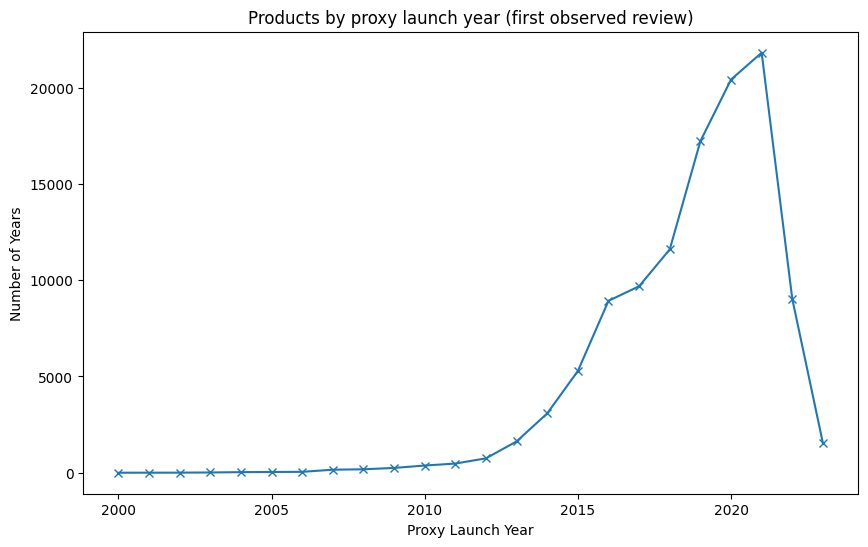

In [ ]:
# Plotting feasibility
plt.figure(figsize=(10,6))
plt.plot(cohort['launch_year'], cohort['products'], marker='x')
plt.title("Products by proxy launch year (first observed review)")
plt.xlabel("Proxy Launch Year")
plt.ylabel("Number of Years")
plt.show()

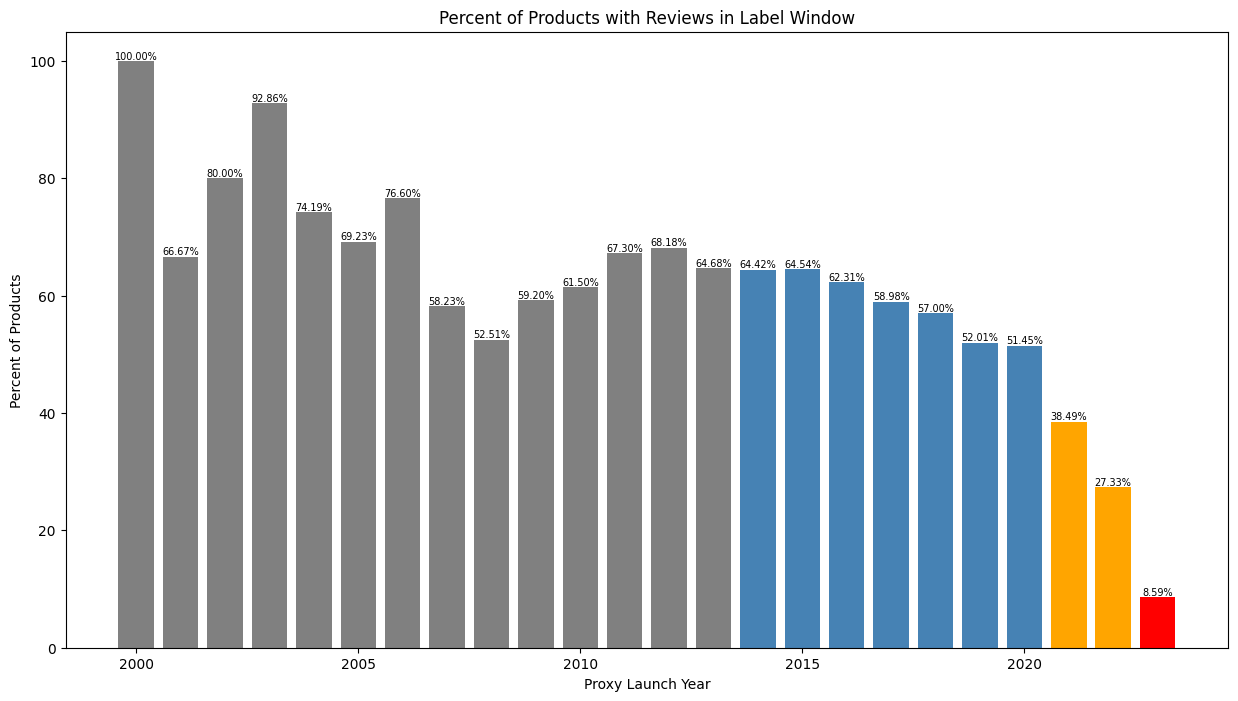

In [ ]:
# Plotting Bar graph of years and Percent of reviews beyond review window with percentages
plt.figure(figsize=(15,8))

# Color logic:
# - Pre-2014: very small cohorts → percentages are noisy (small-n)
# - 2014–2020: stable observation era (large cohorts, more complete follow-up)
# - 2021–2022: lower follow-up / shorter review lifespans (many products stop receiving reviews before day 55)
# - 2023: partial-year / dataset end effects likely strongest

colors = []
for y in cohort["launch_year"]:
    if y <= 2013:
        colors.append("gray")
    elif 2014 <= y <= 2020:
        colors.append("steelblue")
    elif 2021 <= y <= 2022:
        colors.append("orange")
    else:  # 2023
        colors.append("red")

plt.bar(cohort["launch_year"], cohort["pct_labelable"], color=colors)


for i, v in zip(cohort['launch_year'], cohort['pct_labelable']):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom', fontsize = 7)
plt.title("Percent of Products with Reviews in Label Window")
plt.xlabel("Proxy Launch Year")
plt.ylabel("Percent of Products")
plt.show()


In [ ]:
# Why color-code cohorts?
# - Pre-2014 (gray): very small cohort sizes; percentages are unstable (small-n) and not used for modeling conclusions.
# - 2014–2020 (blue): “stable” cohorts with large sample sizes and more complete follow-up, ideal for training/validation.
# - 2021–2022 (orange): noticeable drop in pct_labelable, driven primarily by shorter review lifespans
#   (many products stop receiving reviews before day 55), not simply lack of calendar time.
# - 2023 (red): lowest labelability; likely impacted most by dataset end / partial-year coverage, so treated cautiously.
#
# Note: pct_labelable here is based on coverage_days = last_review_date - launch_date (>=55),
# i.e., it measures whether a product continues to receive reviews long enough to observe the full label window.

In [ ]:
# =============================================================================
# FINAL EDA CONCLUSIONS + MODELING DECISIONS
# =============================================================================
# 1) Modeling grain:
#    - Model at parent_asin (product family) since metadata is keyed by parent_asin and variant-level ASINs are rare.
#
# 2) Time anchor (proxy launch):
#    - Defined “launch date” as the first observed review date per parent_asin (proxy launch) and compute day_from_launch.
#    - Provides consistent, leakage-safe anchor for early-window features and future-window outcomes.
#
# 3) Source-of-truth:
#    - reviews_df is the source-of-truth for ALL time-based features/labels.
#    - Metadata is used only for static enrichment (e.g., store/category/price) because meta aggregates may not match
#      event-level review counts and can introduce leakage.
#
# 4) Data sparsity (early window):
#    - Early review volume is extremely sparse: median reviews_28d = 1 and 90% of products have <= 2 reviews in the first 28 days.
#    - Therefore, trend/variance/sentiment-drift features are not reliable for the “typical” product without an eligibility filter.
#
# 5) Eligibility filter (signal quality):
#    - Restrict the modeling population to products with reviews_28d >= 3 to reduce small-sample noise and ensure early features
#      (velocity/trend/stability/sentiment drift) are meaningful.
#    - With this threshold, we retain 8,674 products with sufficient early activity, and 7,299 of them are eligible for labeling
#      under our outcome observability rule.
#
# 6) Outcome observability (label feasibility):
#    - To define a reliable future-window label (days 28–55), it requires coverage_days >= 55 (enough observed timeline).
#    - Cohort analysis shows labelability declines in newer launch years; 2023 is most impacted (partial-year / limited follow-up).
#
# 7) Ratings + engagement signals:
#    - Ratings are positively skewed (majority 5), so mean rating alone is insufficient; will engineer stability/polarization
#      features (low-star share, variance, trend) alongside traction signals (review velocity).
#    - helpful_vote is sparse and heavy-tailed; we will use product-level aggregates (e.g., sum, %>0) within the first 28 days.
#    - verified_purchase is retained as a trust signal (% verified within first 28 days).
#    - user_id is excluded from modeling to avoid user-identity bias and keep focus on product-level performance.


In [ ]:
# Quickly Analyzing Meta Data to determine key features to include in the modeling stage
# =============================================================================
# META DATA ANALYSIS (Quick + Practical)
# =============================================================================
# Goal: Use meta_df ONLY for static enrichment (ex: brand, price, store/category) and dashboard slicing.
# We will NOT use meta aggregates (ex: rating_number / average_rating) for modeling because:
#   1) they can leak “lifetime” information beyond our 28-day window, and
#   2) we already observed meta counts may not match event-level review rows.
#
# Approach:
# 1) Validate joinability with reviews_df at parent_asin level (already confirmed).
# 2) Check missingness + value distributions for key static fields (brand, price, store/category).
# 3) Decide the final set of meta columns to carry forward into the engineered product table.
# 4) Later (next notebook), we’ll run an ablation check to see if these static meta features improve the model.
# =============================================================================


In [ ]:
meta_df.head(2)

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,All Beauty,"Howard LC0008 Leather Conditioner, 8-Ounce (4-Pack)",4.8,10,[],[],NaN,"[{'thumb': 'https://m.media-amazon.com/images/I/41qfjSfqNyL._SS40_.jpg', 'large': 'https://m.media-amazon.com/images/I/41qfjSfqNyL.jpg', 'variant': 'MAIN', 'hi_res': None}, {'thumb': 'https://m.media-amazon.com/images/I/41w2yznfuZL._SS40_.jpg', 'large': 'https://m.media-amazon.com/images/I/41w2yznfuZL.jpg', 'variant': 'PT01', 'hi_res': 'https://m.media-amazon.com/images/I/71i77AuI9xL._SL1500_.jpg'}]",[],Howard Products,[],"{'Package Dimensions': '7.1 x 5.5 x 3 inches; 2.38 Pounds', 'UPC': '617390882781'}",B01CUPMQZE,NaN
1,All Beauty,"Yes to Tomatoes Detoxifying Charcoal Cleanser (Pack of 2) with Charcoal Powder, Tomato Fruit Extract, and Gingko Biloba Leaf Extract, 5 fl. oz.",4.5,3,[],[],NaN,"[{'thumb': 'https://m.media-amazon.com/images/I/41b+11d5igL._SS40_.jpg', 'large': 'https://m.media-amazon.com/images/I/41b+11d5igL.jpg', 'variant': 'MAIN', 'hi_res': 'https://m.media-amazon.com/images/I/71g1lP0pMbL._SL1500_.jpg'}, {'thumb': 'https://m.media-amazon.com/images/I/41j2ocUzCtL._SS40_.jpg', 'large': 'https://m.media-amazon.com/images/I/41j2ocUzCtL.jpg', 'variant': 'PT01', 'hi_res': 'https://m.media-amazon.com/images/I/81OqvR94isL._SL1500_.jpg'}]",[],Yes To,[],"{'Item Form': 'Powder', 'Skin Type': 'Acne Prone', 'Brand': 'Yes To', 'Age Range (Description)': 'Adult', 'Unit Count': '10 Fl Oz', 'Is Discontinued By Manufacturer': 'No', 'Item model number': 'SG_B076WQZGPM_US', 'UPC': '653801351125', 'Manufacturer': 'Yes to Tomatoes'}",B076WQZGPM,NaN


In [ ]:
# Inspecting the unique values in videos column to understand what values it contains
meta_df['videos'].unique()

array(['[]',
       "[{'title': '2PC rainbow cloud bath bombs,Float on Water&Release Vivid Rainbow Color', 'url': 'https://www.amazon.com/vdp/518d95dae7fa43e8a78cbc009290c421?ref=dp_vse_rvc_0', 'user_id': ''}]",
       "[{'title': 'VIROCHEMISTRY Pheromone Perfume To Attract Men', 'url': 'https://www.amazon.com/vdp/dc7126b4c6ca4db1b60de56c02a84e00?ref=dp_vse_rvc_0', 'user_id': ''}, {'title': 'Watch Before You Buy Raw & AlphaMale Pheromone Cologne', 'url': 'https://www.amazon.com/vdp/0a2336ec1cc4445a8296af399c0d52ea?ref=dp_vse_rvc_1', 'user_id': '/shop/srkent1989'}, {'title': 'Nontoxic cologne smell', 'url': 'https://www.amazon.com/vdp/07bea2cfbcbe41339a2e74101f4fbae9?ref=dp_vse_rvc_2', 'user_id': '/shop/kelsiecrawley'}]",
       ...,
       "[{'title': 'Mizon Cicaluronic Cleansing Balm', 'url': 'https://www.amazon.com/vdp/060d6da738ae4604b8f1fc3ae586672c?ref=dp_vse_rvc_0', 'user_id': ''}, {'title': 'Cicaluronic Cleansing Balm, Make-up Remover by Mizon', 'url': 'https://www.amazon.com/vd

In [ ]:
# Inspecting the unique values in images column to understand what values it contains
meta_df['images'].unique()

array(["[{'thumb': 'https://m.media-amazon.com/images/I/41qfjSfqNyL._SS40_.jpg', 'large': 'https://m.media-amazon.com/images/I/41qfjSfqNyL.jpg', 'variant': 'MAIN', 'hi_res': None}, {'thumb': 'https://m.media-amazon.com/images/I/41w2yznfuZL._SS40_.jpg', 'large': 'https://m.media-amazon.com/images/I/41w2yznfuZL.jpg', 'variant': 'PT01', 'hi_res': 'https://m.media-amazon.com/images/I/71i77AuI9xL._SL1500_.jpg'}]",
       "[{'thumb': 'https://m.media-amazon.com/images/I/41b+11d5igL._SS40_.jpg', 'large': 'https://m.media-amazon.com/images/I/41b+11d5igL.jpg', 'variant': 'MAIN', 'hi_res': 'https://m.media-amazon.com/images/I/71g1lP0pMbL._SL1500_.jpg'}, {'thumb': 'https://m.media-amazon.com/images/I/41j2ocUzCtL._SS40_.jpg', 'large': 'https://m.media-amazon.com/images/I/41j2ocUzCtL.jpg', 'variant': 'PT01', 'hi_res': 'https://m.media-amazon.com/images/I/81OqvR94isL._SL1500_.jpg'}]",
       "[{'thumb': 'https://m.media-amazon.com/images/I/31bz+uqzWCL._SS40_.jpg', 'large': 'https://m.media-amazon.co

In [ ]:
# Inspecting the datatype for videod and images field
print(f"Data type for videos : {meta_df['videos'].dtype}")
print(f"Data type for images : {meta_df['images'].dtype}")

Data type for videos : object
Data type for images : object


In [ ]:
# This project models success using textual (review sentiment) + numerical signals.
# The image/video fields in meta_df are URL links (not usable as-is for modeling here), so we drop them.


meta_static_df = meta_df.drop(columns=['images', 'videos'])
meta_static_df.head(2)

,main_category,title,average_rating,rating_number,features,description,price,store,categories,details,parent_asin,bought_together
0,All Beauty,"Howard LC0008 Leather Conditioner, 8-Ounce (4-Pack)",4.8,10,[],[],NaN,Howard Products,[],"{'Package Dimensions': '7.1 x 5.5 x 3 inches; 2.38 Pounds', 'UPC': '617390882781'}",B01CUPMQZE,NaN
1,All Beauty,"Yes to Tomatoes Detoxifying Charcoal Cleanser (Pack of 2) with Charcoal Powder, Tomato Fruit Extract, and Gingko Biloba Leaf Extract, 5 fl. oz.",4.5,3,[],[],NaN,Yes To,[],"{'Item Form': 'Powder', 'Skin Type': 'Acne Prone', 'Brand': 'Yes To', 'Age Range (Description)': 'Adult', 'Unit Count': '10 Fl Oz', 'Is Discontinued By Manufacturer': 'No', 'Item model number': 'SG_B076WQZGPM_US', 'UPC': '653801351125', 'Manufacturer': 'Yes to Tomatoes'}",B076WQZGPM,NaN


In [ ]:
meta_static_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112590 entries, 0 to 112589
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   main_category    112590 non-null  object 
 1   title            112578 non-null  object 
 2   average_rating   112590 non-null  float64
 3   rating_number    112590 non-null  int64  
 4   features         112590 non-null  object 
 5   description      112590 non-null  object 
 6   price            17704 non-null   float64
 7   store            101246 non-null  object 
 8   categories       112590 non-null  object 
 9   details          112590 non-null  object 
 10  parent_asin      112590 non-null  object 
 11  bought_together  0 non-null       float64
dtypes: float64(3), int64(1), object(8)
memory usage: 10.3+ MB


In [ ]:
# Dropping bough_together because it has no non-null values
meta_static_df = meta_static_df.drop(columns=['bought_together'])

In [ ]:
reviews_df.head(2)

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,review_date
0,5.0,Such a lovely scent but not overpowering.,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!",[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True,2020-05-05
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was described but I was hoping it would be light)",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True,2020-05-04


In [ ]:
sample_merge_df = reviews_df.groupby('parent_asin').agg( avg_rating_reviews = ('rating', 'mean'), rating_counts = ('rating', 'size'))
test = sample_merge_df.merge(meta_static_df, on="parent_asin", how="left")

# Note: average_rating and rating_number are lifetime-style aggregates from metadata.
# Using them as model features would leak information beyond our 28-day window.
# Keeping them only for sanity checks / descriptive analysis (not used in training features).


In [ ]:
test.head()

,parent_asin,avg_rating_reviews,rating_counts,main_category,title,average_rating,rating_number,features,description,price,store,categories,details,rating_gap,rating_count_gap
0,0005946468,5.000000,1,All Beauty,Patanjali Moisturizer Cream - Pack of 2,5.0,2,[],[],NaN,patanjali,[],"{'Brand': 'Patanjali', 'Item Form': 'Cream', 'Unit Count': '1 Count', 'Number of Items': '2', 'Use for': 'Face', 'Package Dimensions': '6.61 x 2.8 x 2.2 inches; 1.76 Ounces'}",0.000000,1
1,0123034892,5.000000,1,All Beauty,Yardley Lace Satin Deodorant Spray for women 150 ml (Pack of 2),5.0,1,[],[],NaN,NaN,[],"{'Item Form': 'Spray', 'Unit Count': '10.14 Fl Oz', 'Item Volume': '150 Milliliters'}",0.000000,0
2,0124784577,4.333333,3,All Beauty,WOW Organics Apple Cider Vinegar Shampoo - 300 mL,3.8,15,[],[],NaN,WOW Organics Apple Cider Vinegar Shampoo - 300 mL,[],"{'Brand': 'WOW Organics Apple Cider Vinegar Shampoo - 300 mL', 'Item Form': 'Liquid', 'Age Range (Description)': 'Adult', 'Liquid Volume': '300 Milliliters', 'Number of Items': '1', 'Is Discontinued By Manufacturer': 'No'}",0.533333,12
3,0515059560,4.000000,1,All Beauty,Love on the Run,4.0,1,[],[],NaN,Jove,[],"{'Package Dimensions': '6.8 x 4.2 x 0.7 inches; 1.01 Pounds', 'Manufacturer': 'Jove'}",0.000000,0
4,0692508988,5.000000,1,All Beauty,The Listening Cards,5.0,1,[],"['The Listening Cards are an eloquent primer in the art of listening, offering you quick, straightforward and memorable lessons and graphics to help you and those you know easily improve your listening skills without having to read a big book. Each deck also includes underlying philosophy for listening and instructions for using the cards individually, with a partner or with a group. Attending website has free lessons and videos to learn even more.']",NaN,Listening Planet,[],"{'Package Dimensions': '4 x 2.5 x 0.5 inches; 3 Ounces', 'Manufacturer': 'Listening Planet'}",0.000000,0


In [ ]:
test[['parent_asin', 'avg_rating_reviews', 'average_rating', 'rating_counts', 'rating_number']].head(10)

,parent_asin,avg_rating_reviews,average_rating,rating_counts,rating_number
0,0005946468,5.000000,5.0,1,2
1,0123034892,5.000000,5.0,1,1
2,0124784577,4.333333,3.8,3,15
3,0515059560,4.000000,4.0,1,1
4,0692508988,5.000000,5.0,1,1
5,069267599X,4.780488,4.8,41,176
6,0764490117,5.000000,5.0,2,2
7,0816091846,4.642857,3.8,14,15
8,0963416391,5.000000,5.0,1,1
9,0966068432,5.000000,5.0,2,2


In [ ]:
# Validating if average rating is null in meta data
test["average_rating"].isna().sum()

np.int64(0)

In [ ]:
test['rating_gap'] = test['avg_rating_reviews'] - test['average_rating']
test[['rating_gap', 'avg_rating_reviews', 'average_rating']].describe(percentiles = [0.5, 0.75, 0.9, 0.95, 0.99])


,rating_gap,avg_rating_reviews,average_rating
count,112565.000000,112565.000000,112565.000000
mean,-0.068320,3.815085,3.883405
std,0.953845,1.298187,0.874423
min,-4.000000,1.000000,1.000000
50%,0.000000,4.166667,4.000000
75%,0.466667,5.000000,4.500000
90%,1.000000,5.000000,5.000000
95%,1.400000,5.000000,5.000000
99%,2.000000,5.000000,5.000000
max,4.000000,5.000000,5.000000


In [ ]:
test['rating_count_gap'] = test['rating_number'] - test['rating_counts']  # To maintain positive values in percentiles
test[['rating_count_gap', 'rating_number', 'rating_counts']].describe(percentiles = [0.5, 0.75, 0.9, 0.95, 0.99])

,rating_count_gap,rating_number,rating_counts
count,112565.000000,112565.000000,112565.000000
mean,44.308009,50.540212,6.232204
std,301.116873,311.023125,25.189840
min,-707.000000,1.000000,1.000000
50%,7.000000,9.000000,2.000000
75%,23.000000,28.000000,4.000000
90%,70.000000,82.000000,11.000000
95%,144.000000,167.000000,21.000000
99%,606.360000,677.000000,73.000000
max,30203.000000,30206.000000,1962.000000


In [ ]:
# The median gap between ratings in reviews and meta data is 0, but it does have a long tail (99th percentile = 2) indicates that metadata aggregates can diverge
# from event-derived ratings for a small subset (1%) of the products in the dataset.

In [ ]:
test['main_category'].value_counts()

,count
main_category,
All Beauty,112110
Premium Beauty,455


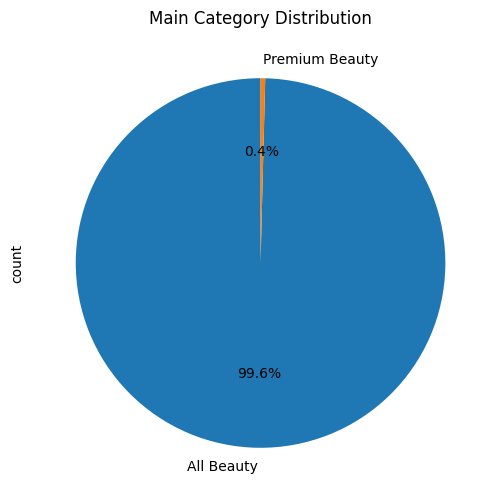

In [ ]:
plt.figure(figsize=(10, 6))
test['main_category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Main Category Distribution')
plt.show()

In [ ]:
test['features'].value_counts()

,count
features,
[],95190
['Packaging for this product may vary from that shown in the image above'],25
['ml size perfect for travelling'],20
"['Formulated with Vitamin E', 'Pigmented, Satin/Glossy Finish', 'Lightweight, Comfortable Wear']",16
"[""LIGHTWEIGHT AND COMFORTABLE: The soft knit design makes our headwraps so comfortable to wear, you'll forget you have it on!"", 'EASY TO TIE: No special skills required, our head wraps are super easy to tie. simply wrap your head, tuck the ends, and the stretch knit provides a secure hold.', 'GREAT FOR LAYERING: Our stretch headwraps can be worn alone, or layered with different colored wraps to add flair to any ordinary outfit.', 'EXTRA LONG & WIDE: Made with a generous 70” of length and 32"" of width, this wrap can be worn in variety of styles, and works great for wrapping even very long hair, braids, and dreadlocks.', 'OUR PROMISE TO YOU: The Urban Turbanista takes pride in offering a vibrant collection of goods for those looking to cultivate a life surrounded with vibrant textures and globally inspired handmade goods. We believe in our products and are happy to offer a Zero Risk 100% satisfaction and effectiveness guarantee. If for any reason one of our products is not right for you, we will refund your money hassle free within 30 days of purchase.']",14
...,...
"['Item Type: Pro Nail Form, Designed for Stiletto;', 'Quantity: 100pcs / lot; Size: 7.2cm x 8.7cm / 2.83 in x 3.42 in', 'Material: 1. Thick Material, Good Bearing and Flexible, Great for Moulding; 2. Front Side: Made of Pearlescent Film Paper, Smooth Surface, Easy To Remove Redundant Acrylic Powder or Uv Gel, Can Prevent Nail Form From Corrosion, And More Durable; 3. Back Side: Environmental Friendly Glue, No Hurt to The Skin; 4. Strong Adhesive: Can Be Reused for Twice;', 'Design: 1. The Scale: 11, Which Can Better Help You Control The Length And Curvature; 2. Intensive Scale : Fixed Width, Can Control The Amount Of (acrylic Powder Or Uv Gel); 3. There Are 3 Points To Fix The Nail Form; 4. Unique Opening Mouth Design, Can Better Connect And Fix The Nails And Form Guide To Make Nail Form In Proper Places For Extension,saving Time For Adjustment And Cutting Nail Form. 5. Easy To Remove, But Not Easily Deformed;', 'Application: for Acrylic UV Gel False Nail Tips Extension, can Make Different Nail Shapes as You Wish, such as Stiletto, Square, Rhombus Nails.']",1
"['Unique Design - The redesigned headband, like the sunglasses, is uniquely square, providing volume and style for users with thick hair and wide heads without the headaches or hair damage.', 'Foot position: Original - feet curve around the ears. Relaxed - feet curve away from the ears. The feet are designed so that our users can also wear their glasses at the same time without interference or disruption', 'High Quality: Our products are made of high quality materials, including durable polycarbonate plastic frames and silicone inserts for added retention. They are durable, even with frequent use', 'Hair Type - Thick, medium to tall hair - not recommended for thinning, low volume hair, or petite, faces', 'Customer Service: We always want to provide our customers with better customer service and shopping experience. If there are any questions about our products, please feel free to contact us and we will be available within 24 hours']",1
"['♬[PEARL HAIR BARRETTE]♬ Bring elegance and sophistication to your hairstyle with beautiful pearl hair clip! This hair accessory is designed to not only hold your hair in place, but also complement your style with its pearl embellishments.', ""♬[SIZE & DETAILS]♬ LENGTH = 2.36''*1.18''(6CM*3CM); 14K GOLD PLATED effectively maintain luster and prevent oxidation; Cute shine pearls make the hair barrette more exquisite; Easy to wear and comfortable to wear."", ""♬[MULTIPURPOSE]♬ Perfect for any occasion! Whether you're headed to a party, shopping, working or just daily routine, it makes a great gift, whether you're treating yourself, yo

In [ ]:
test['details'].value_counts()

,count
details,
{},4511
{'Is Discontinued By Manufacturer': 'No'},431
{'Manufacturer': 'CleveAid'},22
{'Item Weight': '0.01 Ounces'},21
{'Manufacturer': 'balloonbobo'},15
...,...
"{'Brand': 'Sally Hansen', 'Item Form': 'Gel', 'Type': 'Gel', 'Special Feature': 'Long Lasting', 'Age Range (Description)': 'Adult', 'Unit Count': '1 Count', 'Liquid Volume': '0.5 Fluid Ounces', 'Item Weight': '0.3 Pounds', 'Is Discontinued By Manufacturer': 'No', 'Package Dimensions': '3.4 x 3.25 x 1.4 inches; 4.8 Ounces', 'UPC': '074170449921'}",1
"{'Brand': 'Sally Hansen', 'Item Form': 'Gel', 'Type': 'Gel', 'Age Range (Description)': 'Adult', 'Unit Count': '1.00 Count', 'Package Dimensions': '4.7 x 3.7 x 2.7 inches; 5.61 Ounces'}",1
"{'Product Benefits': 'Anti-Frizz', 'Material Type Free': 'Sulfate Free', 'Item Form': 'Cream', 'Brand': 'KERAGEN', 'Hair Type': 'All', 'Is Discontinued By Manufacturer': 'No', 'Package Dimensions': '9.53 x 3.9 x 1.93 inches; 10 Ounces', 'UPC': '755439998458'}",1


In [ ]:
test['description'].value_counts()

,count
description,
[],93405
['1'],99
['All Beauty'],20
['This product is not eligible for priority shipping. Image may vary from the actual product.'],16
"['A moisturizing, pigment-rich lipstick available in a variety of natural and glamorous shades that offer medium-to-full lip coverage. Long-lasting and non-toxic, NK Lipstick leaves a smooth, semi-matte finish.']",15
...,...
"['---------------------Welcome to Our Shop---------------------2PC Curly Hair Large Headband, Hairstyle Fixing Tool, Invisible Hair Hoop，Curly Thick Hair Large HeadbandOur product is made from high quality materials, consisting of a durable polycarbonate plastic frame and silicone insert for added hold. They\'re built to last, even with frequent use👍Hairstyle Fixing Tool for Curly HairFeet curve around the ear. Slim Relaxed Fit - the feet curve away from the ear. The legs are designed so our user can also wear glasses simultaneously without interference or compromiseSize : 14x15.5cm/5.51x5.9inClick on ""ADD TO CART"" to get yours now!']",1
"['WHAT YOU GET:', 'We will s erve you 30-DAY MONEY-BACK GUARANTEE for any reason and friendly helpful customer service, if these Mouse Ears Headband do not meet your need. It would be wonderful gift .', 'PERFECT FOR VARIOUS OCCASIONS: Cosplay, Costuming, Theme Park, Party, Park or Whimsical everyday wear.', 'Features:', '✔1. Thickness:', 'The ear of our mouse ears headbands is about 1cm/ 0.4inch in thickness, which enables ears stand upright on your head.', '✔2.Fabric and Edging', 'Ultra-soft velvet ears attach to a sturdy wide headband which is also wrapped by velvet. This will offer you a comfortable fit. and Firm edge bonding avoids ears from being ripped', '✔3.Bow', 'Our bow is attached to headband and ears for 4 times. Thus, bow will never fall off from headband.', 'Product Details:', 'Weight:11.2 ounces packaging dimension: 9.1 x 9.1 x 3.5 inches Material: short plush fabric and bow size: 8.7 x 7.1 x 0.6 inches diameter: min 4.5 inches, Max 7.9 inches', 'Color:', 'Red polka dot and black', 'Package Includes:', '10 x Red polka dot Headband 10 x Black Headband Now', '""Add to cart""', 'to start creating your Cosplay , Party', 'Customer Service:', 'If you have any problem of our product, you can click “seller contact” button in your Amazon account to email us. we would be delighted to help you and we will reply as soon as we can.', 'Product Warranty:', ""48 days money-back & 24-month warranty. Any questions you have, please don't hesitate to contact us. If you like our product, click Add to Cart to get it.""]",1
"['PROFESSIONAL ROSE GOLD KOLINSKY NAIL BRUSH #8 Professional Rose Gold Kolinsky Nail Brush #8, perfect for sculpting acrylic nail extensions or encapsulations, it is developed to get the best control of acrylic pearls and retention of nail liquid monomer, ideal for a flexible and precise nail application. Efficient, convenient and stylish with a rose gold finish. Professional Rose Gold Kolinsky Nail Brush #8 For acrylic nail system Best control of acrylic pearls and retention of nail sculpting liquid Perfect for sculpting acrylic nail extensions or encapsulations Flexible bristles Crimped nail brush Light weight Efficient, convenient and stylish Rose gold finish Before the first use, remove the protection adhesive of the bristles After every nail application, properly clean the brush using Brush Cleaner']",1


In [ ]:
test['price'].value_counts()

,count
price,
9.99,631
19.99,363
14.99,314
8.99,283
7.99,280
...,...
23.13,1
296.00,1
22.26,1


In [ ]:
test['price'].isna().sum()

np.int64(94863)

In [ ]:
test['store'].isna().sum()

np.int64(11344)

In [ ]:
test['store'].value_counts()

,count
store,
Bath & Body Works,481
WILLBOND,388
Hairro,381
Generic,369
S-noilite,340
...,...
Edlike,1
B_LAB,1
Cephermer,1


In [ ]:
test['categories'].value_counts()

,count
categories,
[],112565


In [ ]:
# =============================================================================
# Metadata EDA Wrap-Up / Modeling Decisions
# =============================================================================
# Goal: Use metadata as STATIC enrichment for product segmentation and dashboarding, without introducing leakage.
#
# Key findings:
# 1) High coverage join key: parent_asin links metadata to review events reliably for this category extract.
#
# 2) Leakage risk in meta aggregates:
#    - average_rating and rating_number behave like product-page snapshot/lifetime aggregates.
#    - We observed material gaps between meta aggregates and event-level review logs (counts/means differ, long-tailed gaps),
#      indicating different populations/definitions (e.g., ratings without text reviews) and potential future information.
#    => Decision: EXCLUDE average_rating and rating_number from training features; keep for EDA/dashboard reference only.
#
# 3) Sparse / noisy fields:
#    - price is highly sparse (~16% present). We retain it only with a "price_available" flag (and optional buckets)
#      to avoid biasing the model toward the non-missing subset.
#    - features and description are mostly empty lists / boilerplate marketing text. We do not model raw text here;
#      we keep lightweight derived signals (presence, length, bullet count) for optional ablation.
#
# 4) Structured attributes:
#    - details contains useful nested attributes (e.g., brand/type) but is heterogeneous. We only extract a small set of
#      high-coverage keys and group rare values (Other/Unknown) to keep features stable.
#
# Final metadata kept for the project:
# - Modeling-safe enrichment: store (cleaned), price_available (+ price/bucket if present), selected details keys (e.g., brand),
#   and lightweight completeness indicators for features/description.
# - Dashboard-only context: original descriptive fields for tooltips/slicing (not used in model training).
#
# Next: Join the curated meta enrichment table to the product-level 28-day feature table and validate incremental lift via
# ablation (baseline vs +metadata) under time-based splits.
# =============================================================================

In [ ]:
# =============================================================================
# NEXT STEPS
# =============================================================================
# - Build product-level feature table from days 0–27 (first 28 days) for eligible products.
# - Build success labels from days 28–55 (future traction + rating stability).
# - Evaluate with time-based splits using proxy launch cohorts (robustness to seasonality / right-censoring).
# - Enrich the feature table with curated, leakage-safe metadata (store, price_available/price bucket, selected details keys
#   like brand) and compare baseline vs +metadata via ablation to quantify incremental lift.
# =============================================================================